In [1]:
from scipy.io import loadmat
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def plot(P: np.ndarray, m: int, dataset: str, method: str):
    off_diag_mask = np.eye(*P.shape, dtype=bool)
    vmin = P.min()
    vmax = P.max()

    ticklabels = []

    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111)
    sns.heatmap(P, annot=True, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax, cbar=False, ax=ax, xticklabels=ticklabels, yticklabels=ticklabels)
    sns.heatmap(P, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]), cbar=False, ax=ax, xticklabels=ticklabels, yticklabels=ticklabels)
    fig.savefig(f'plots/P_{m}_{dataset}_{method}.pdf', bbox_inches='tight', dpi=300)

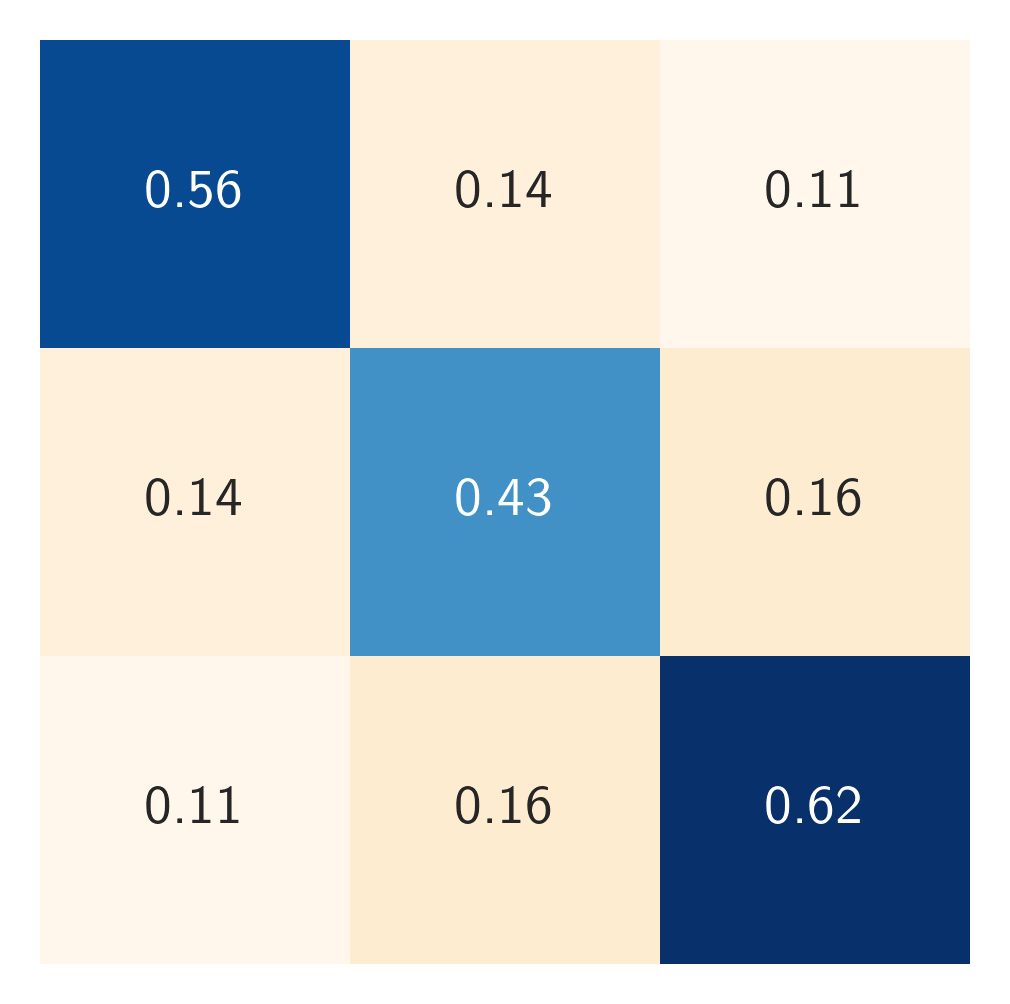

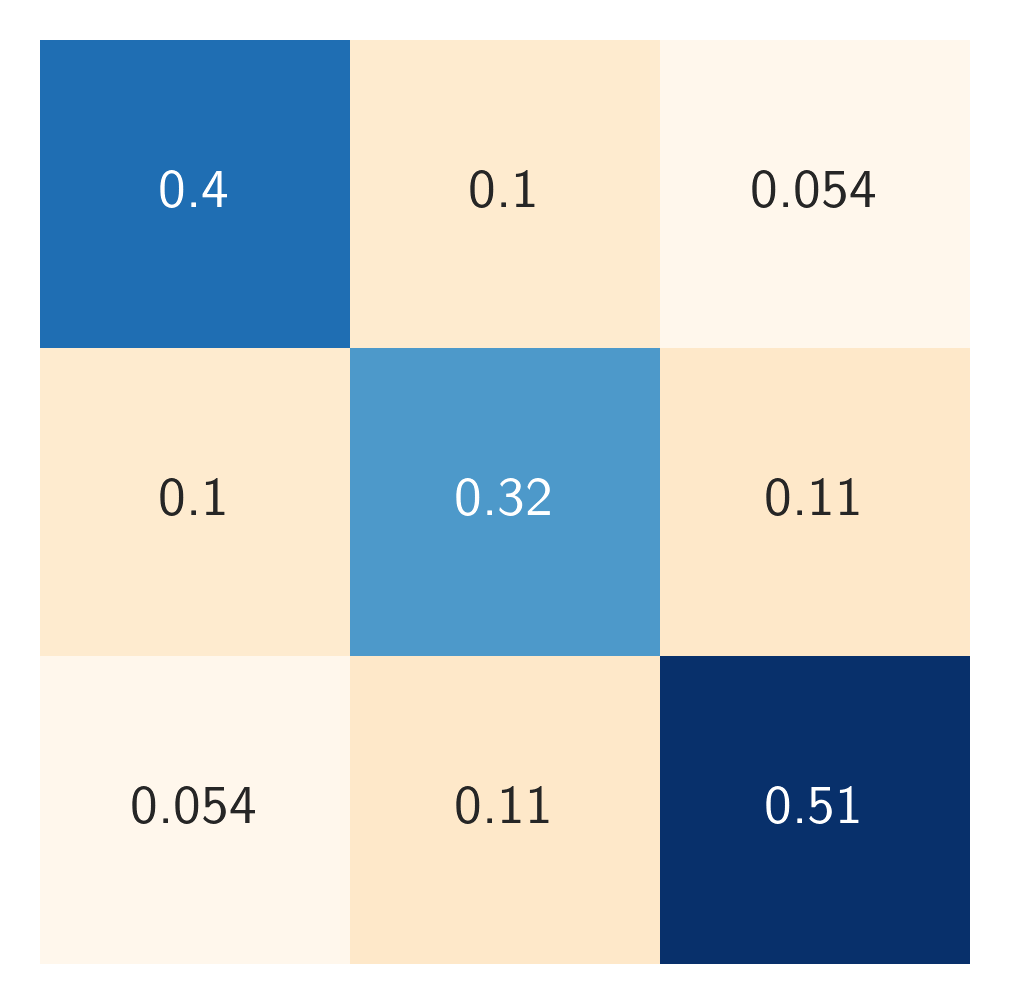

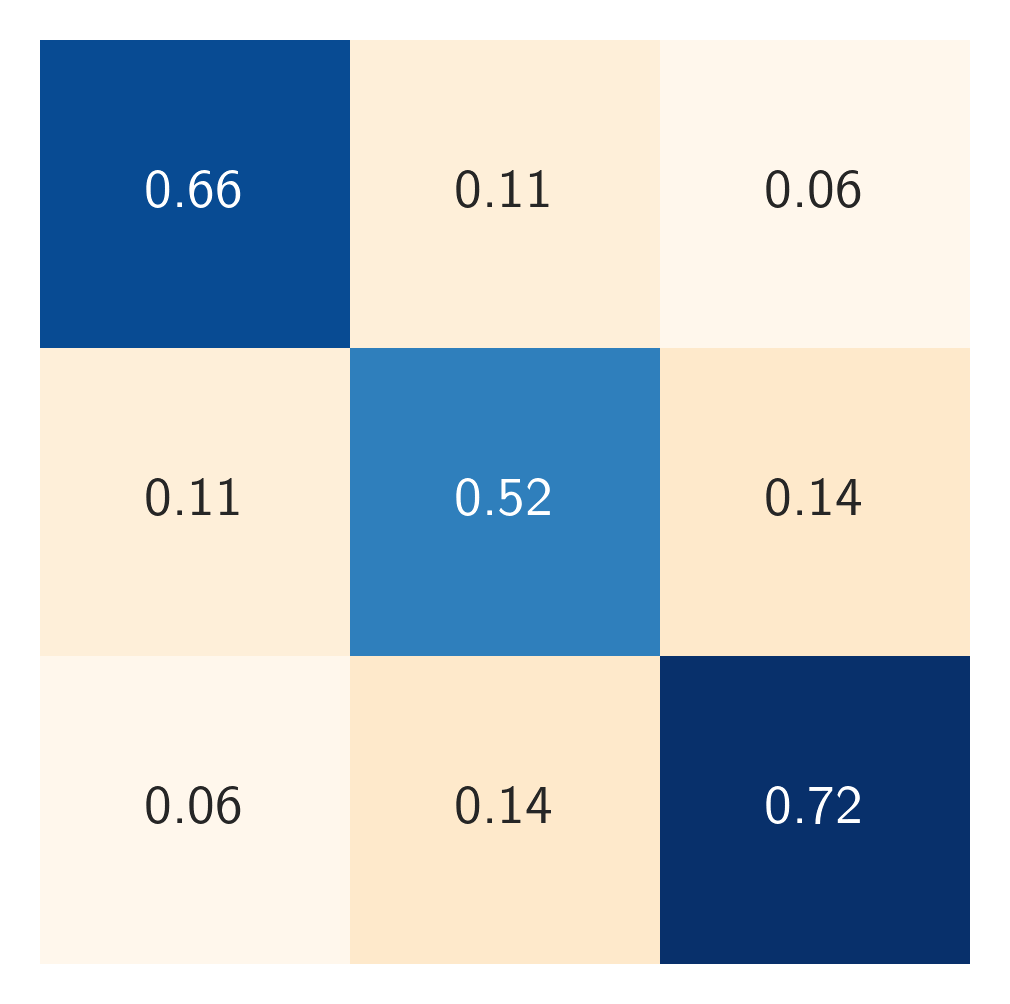

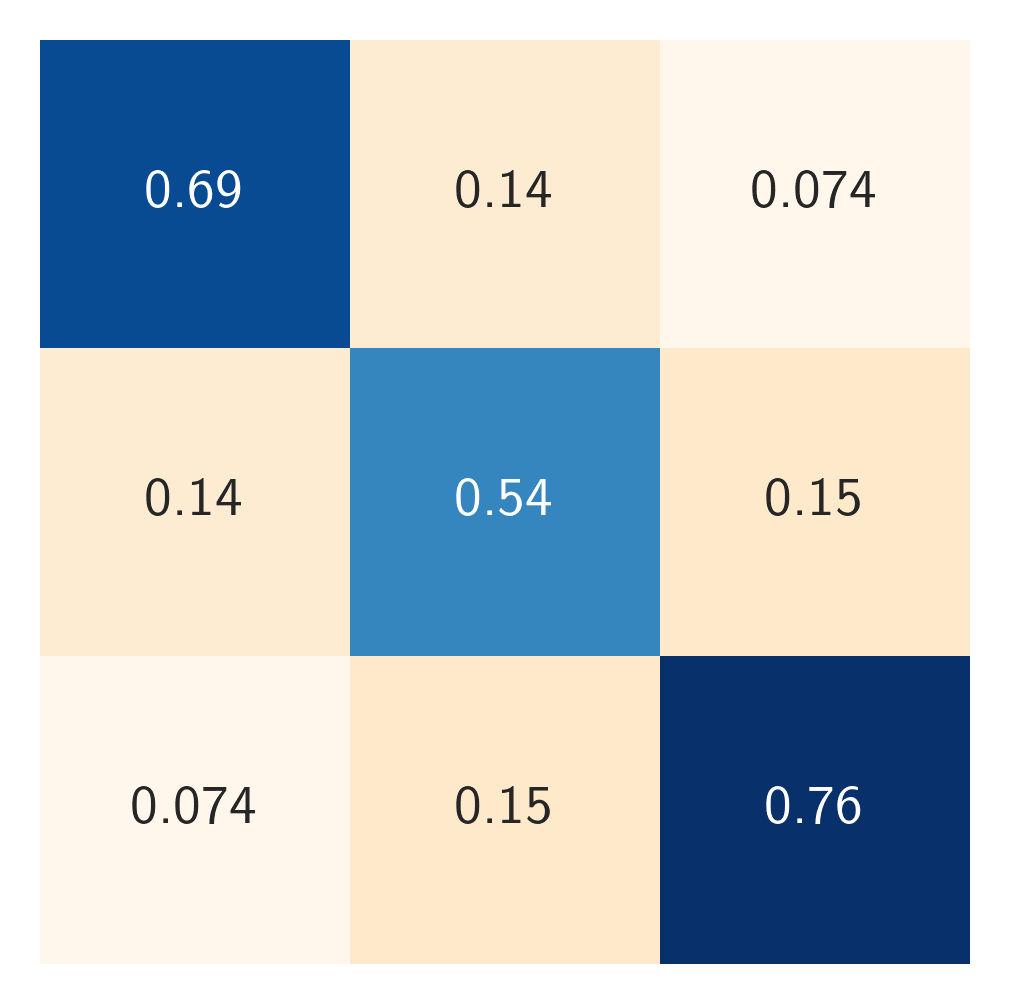

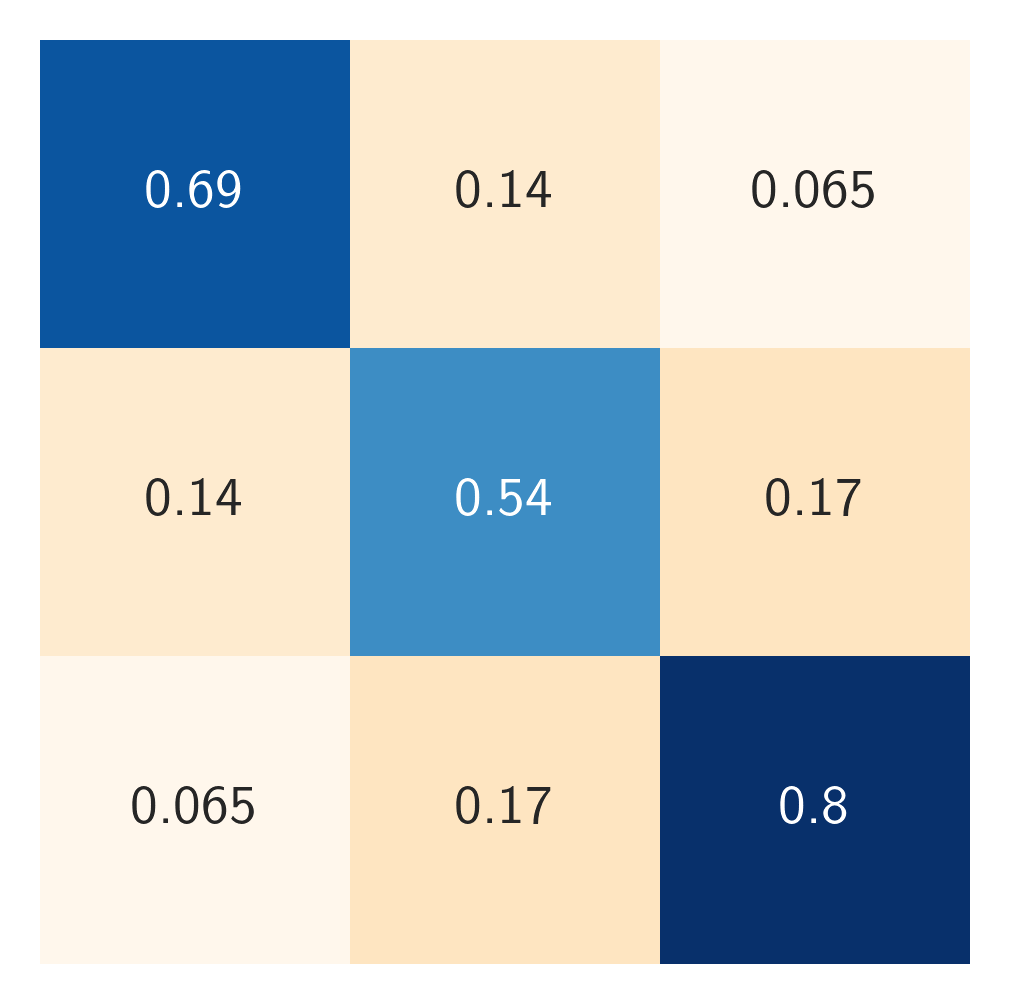

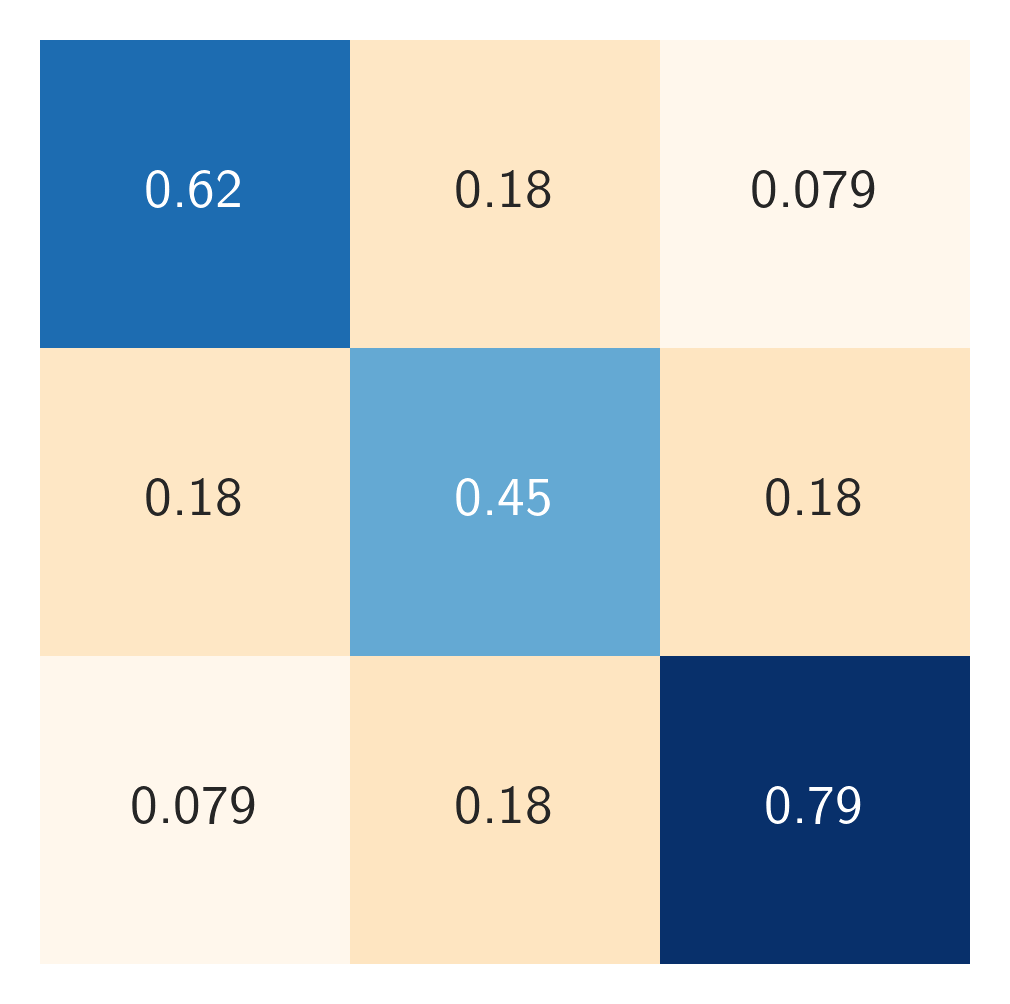

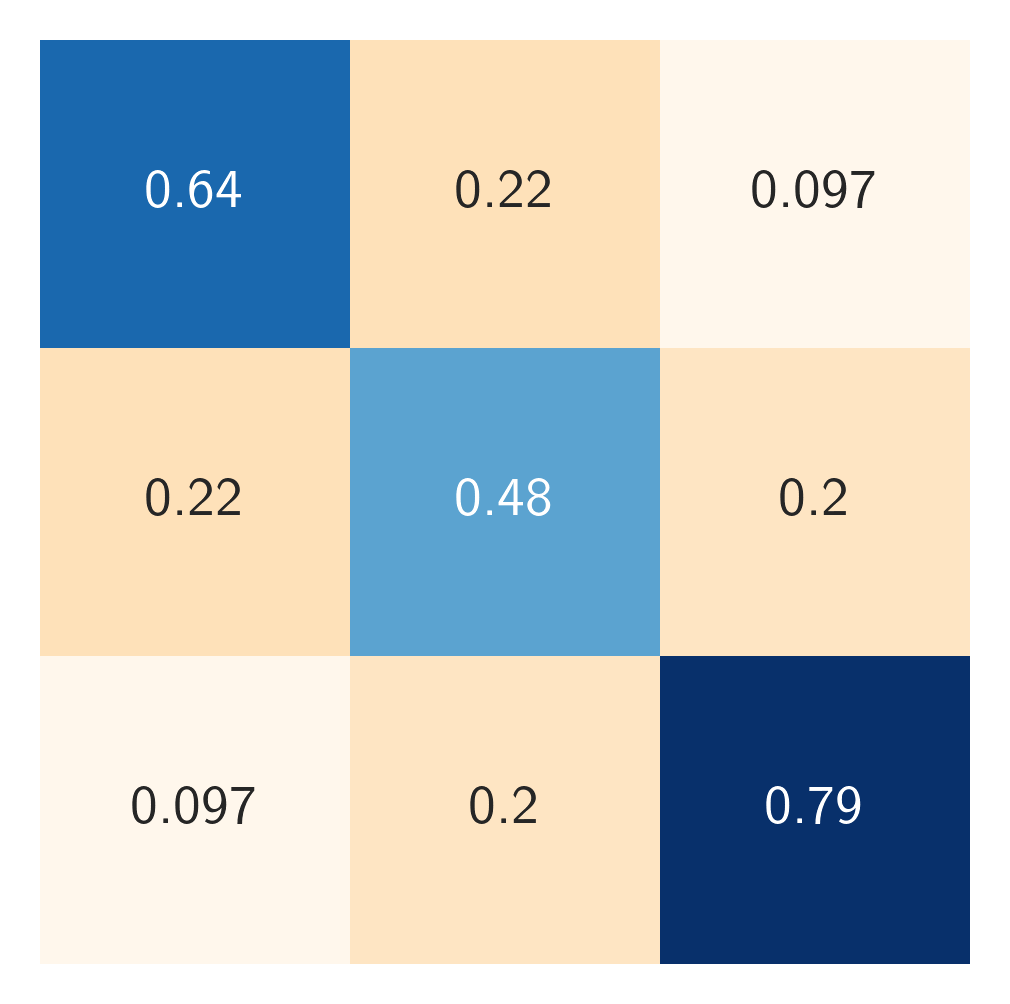

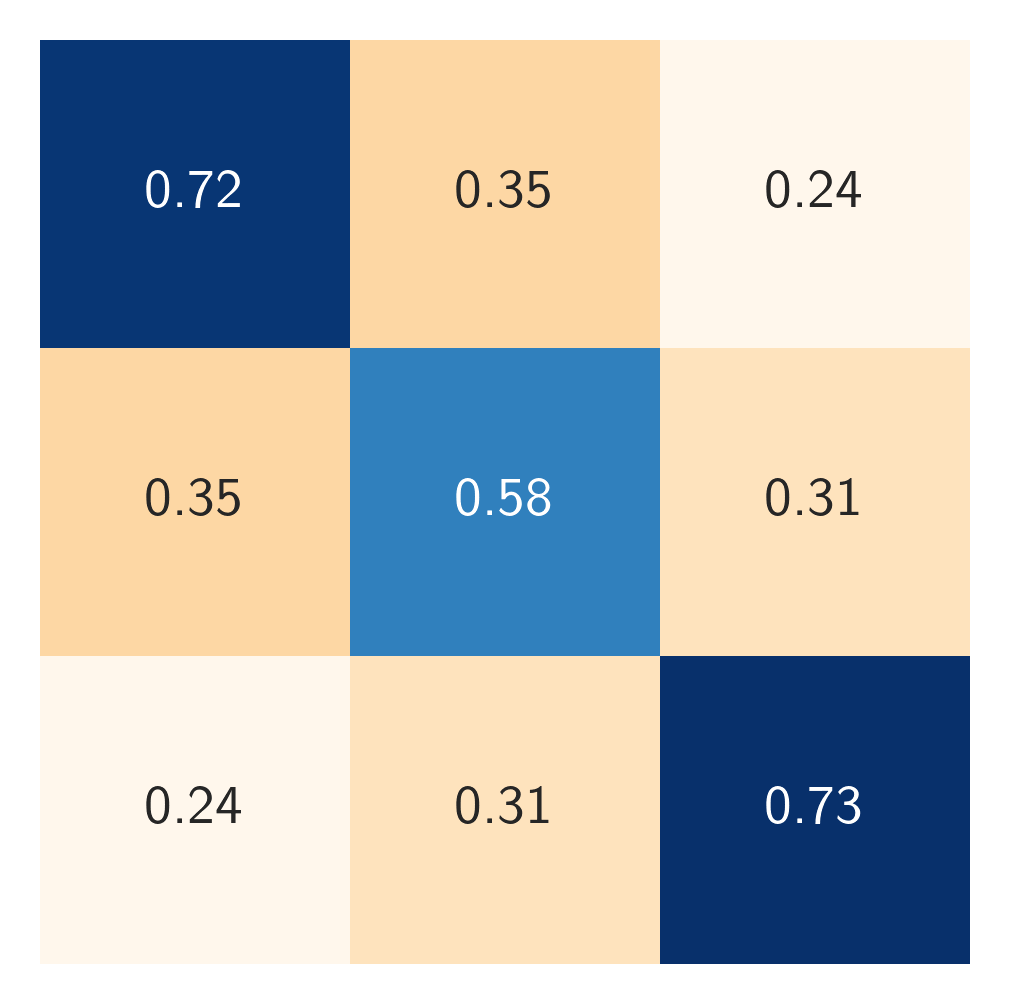

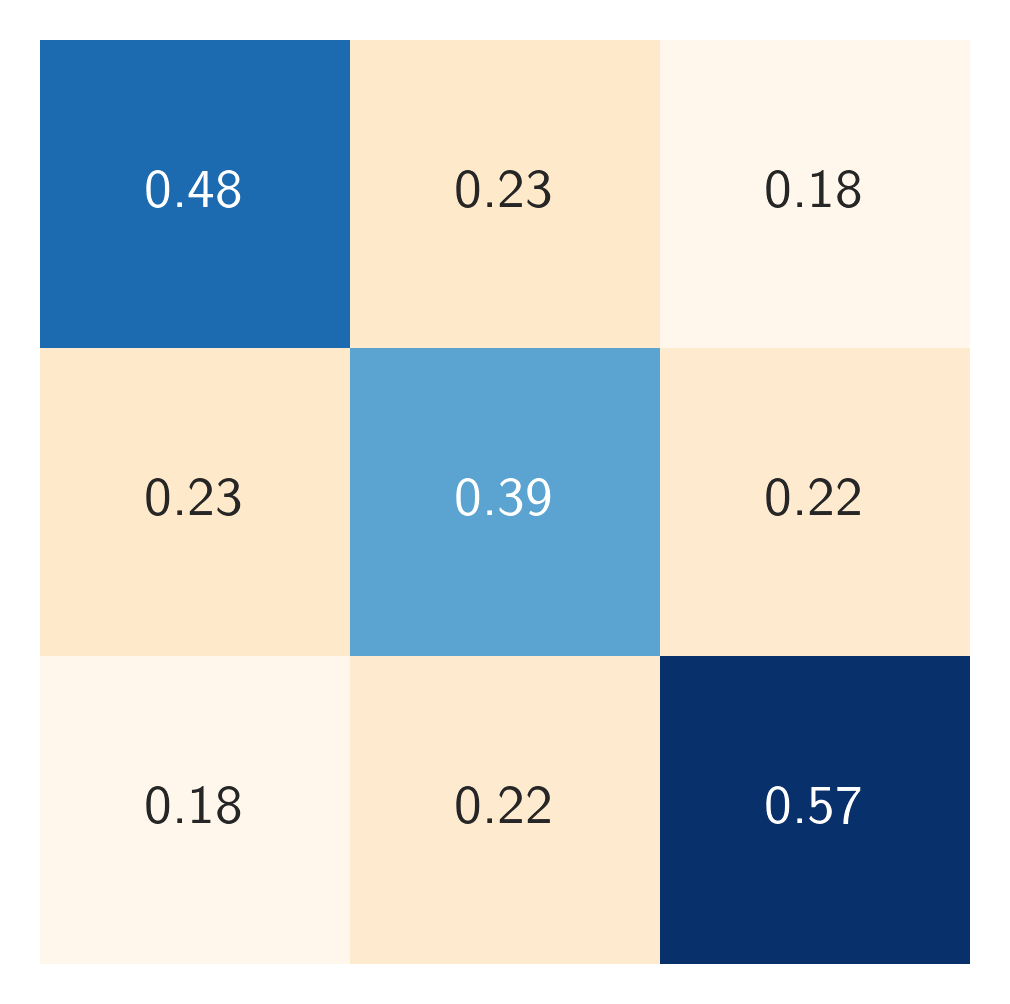

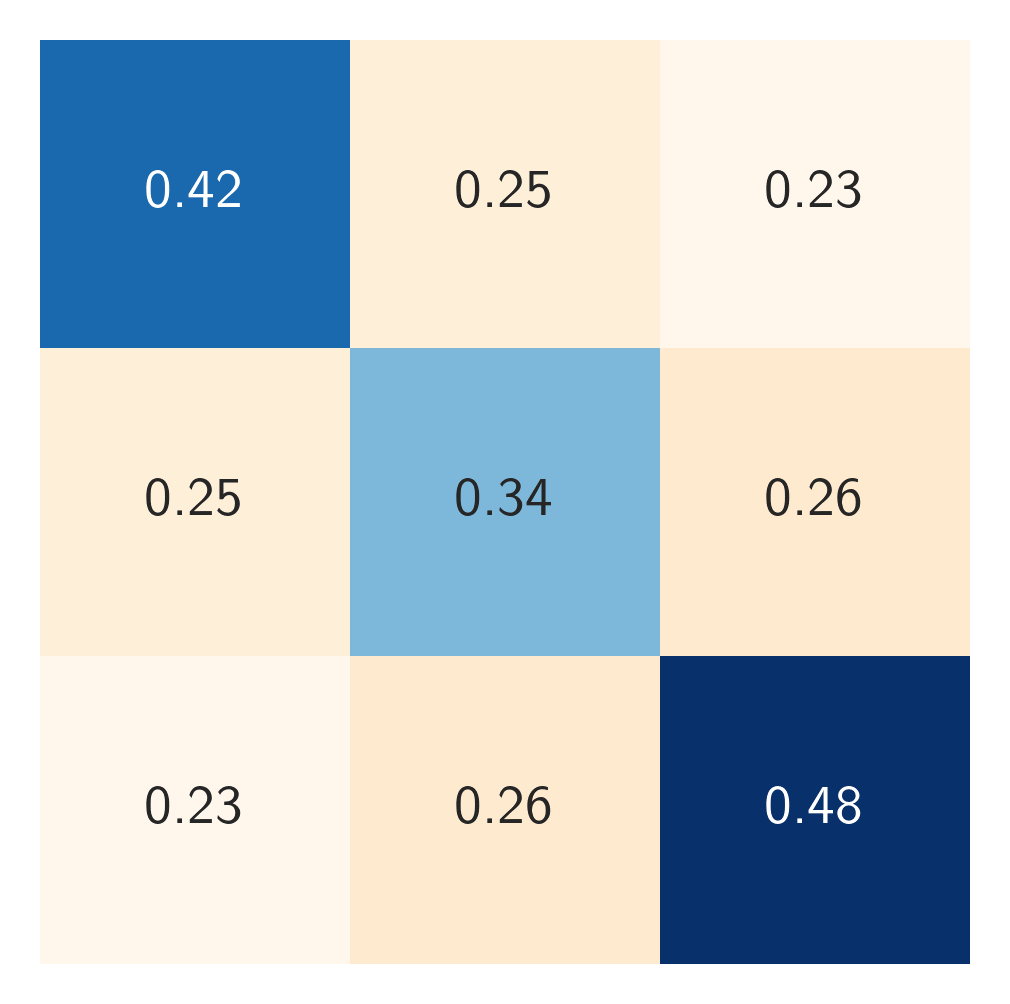

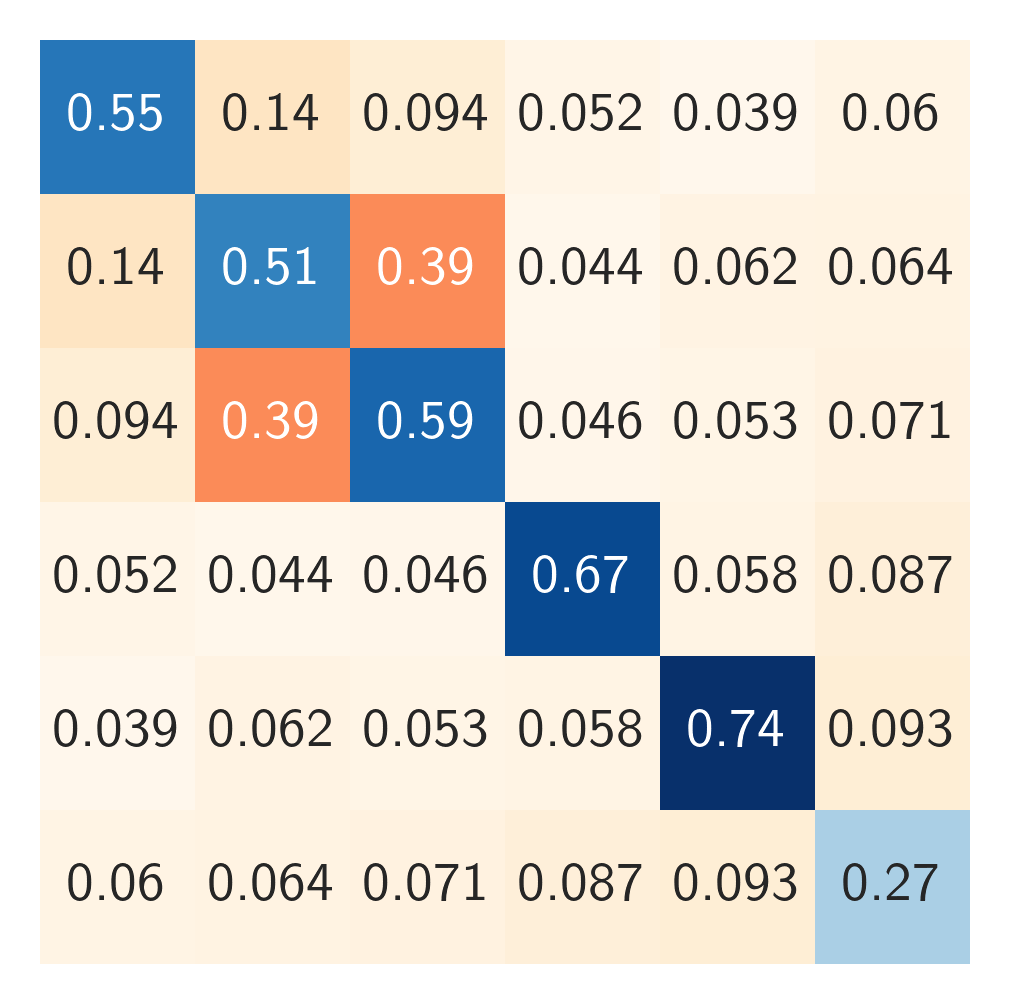

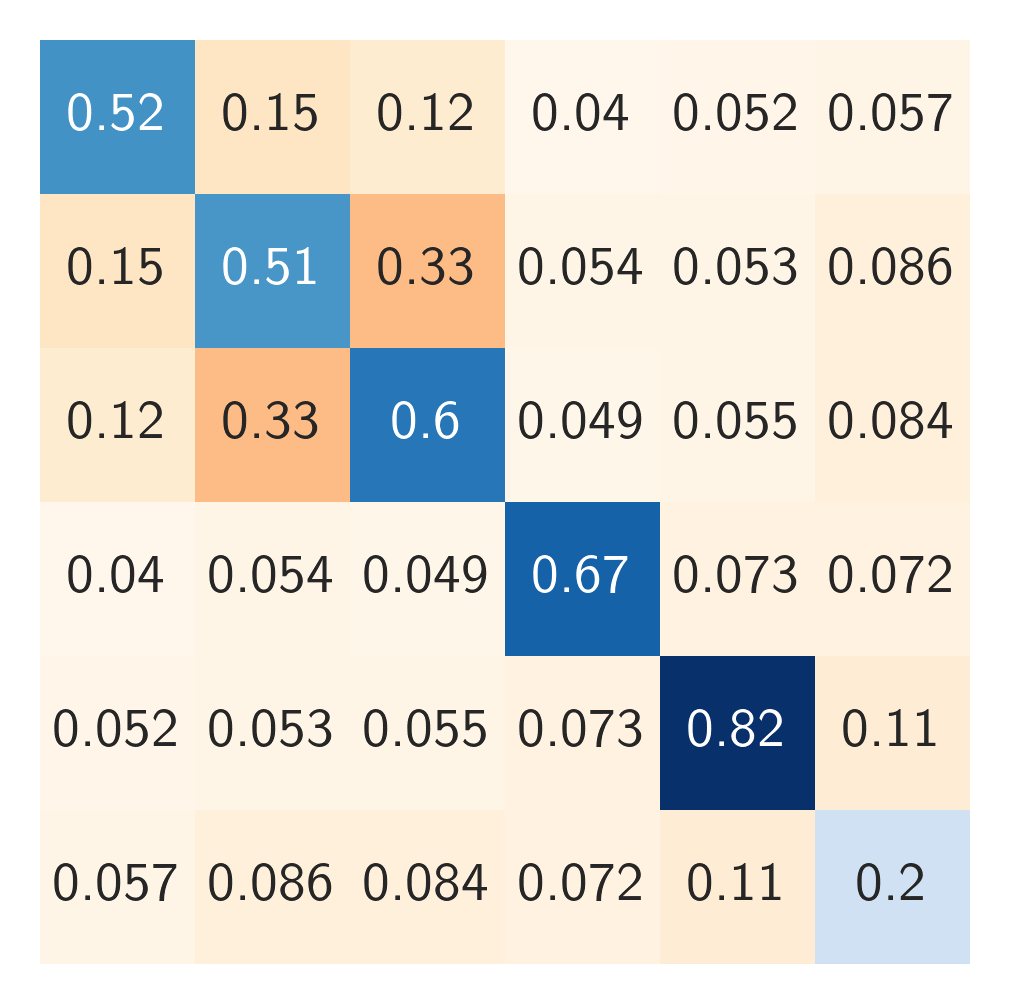

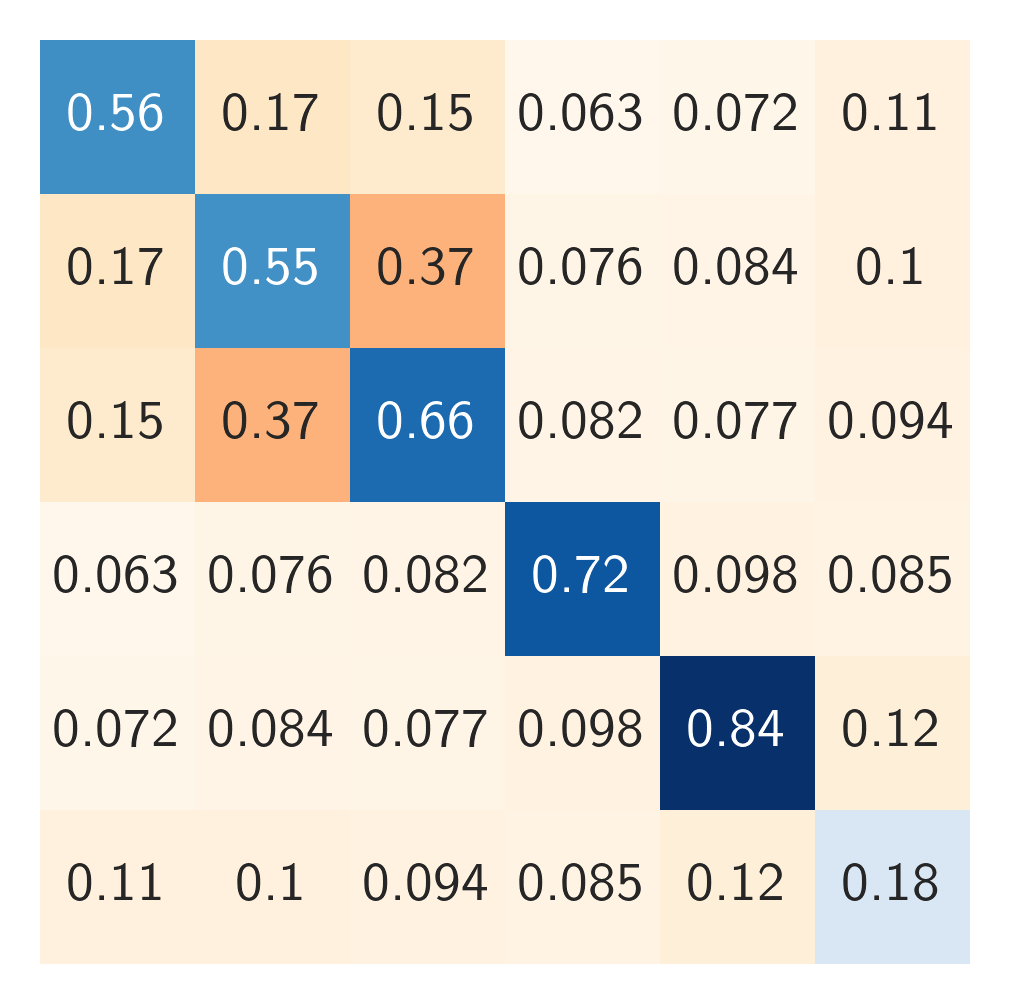

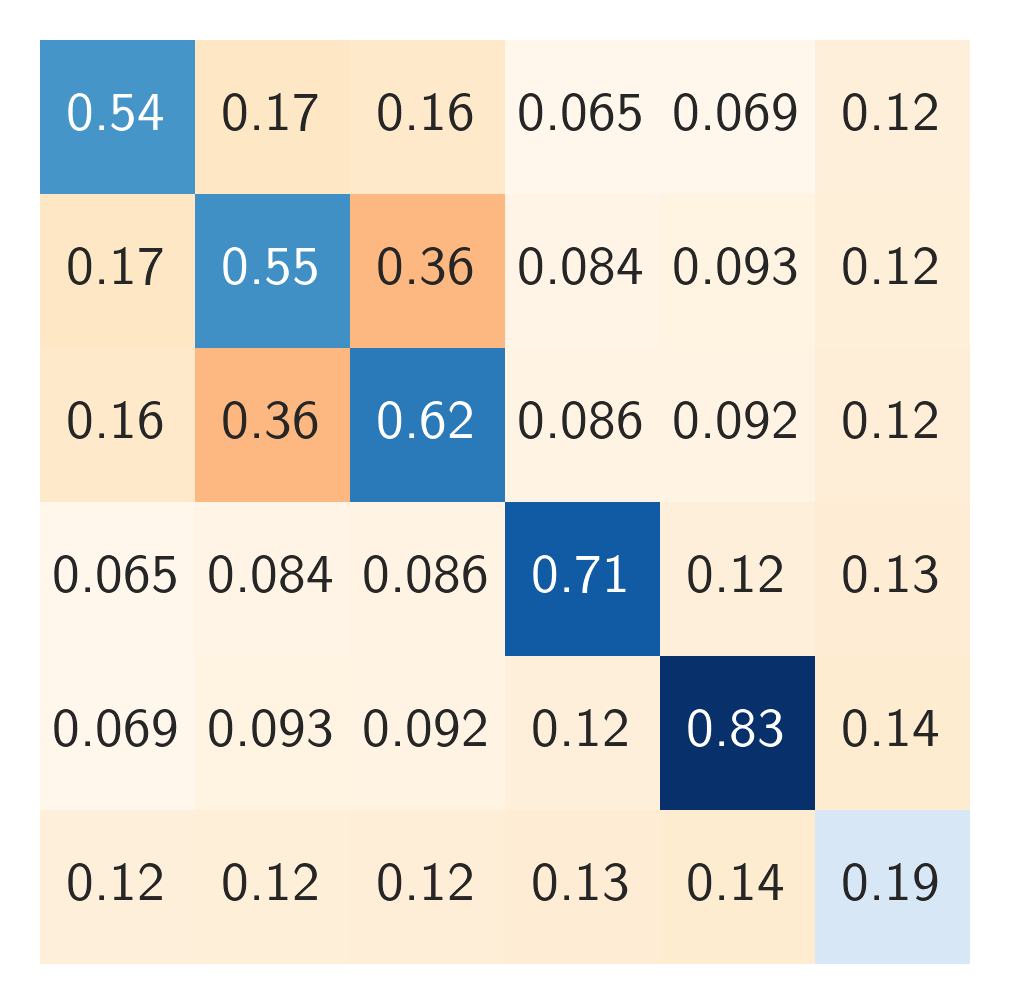

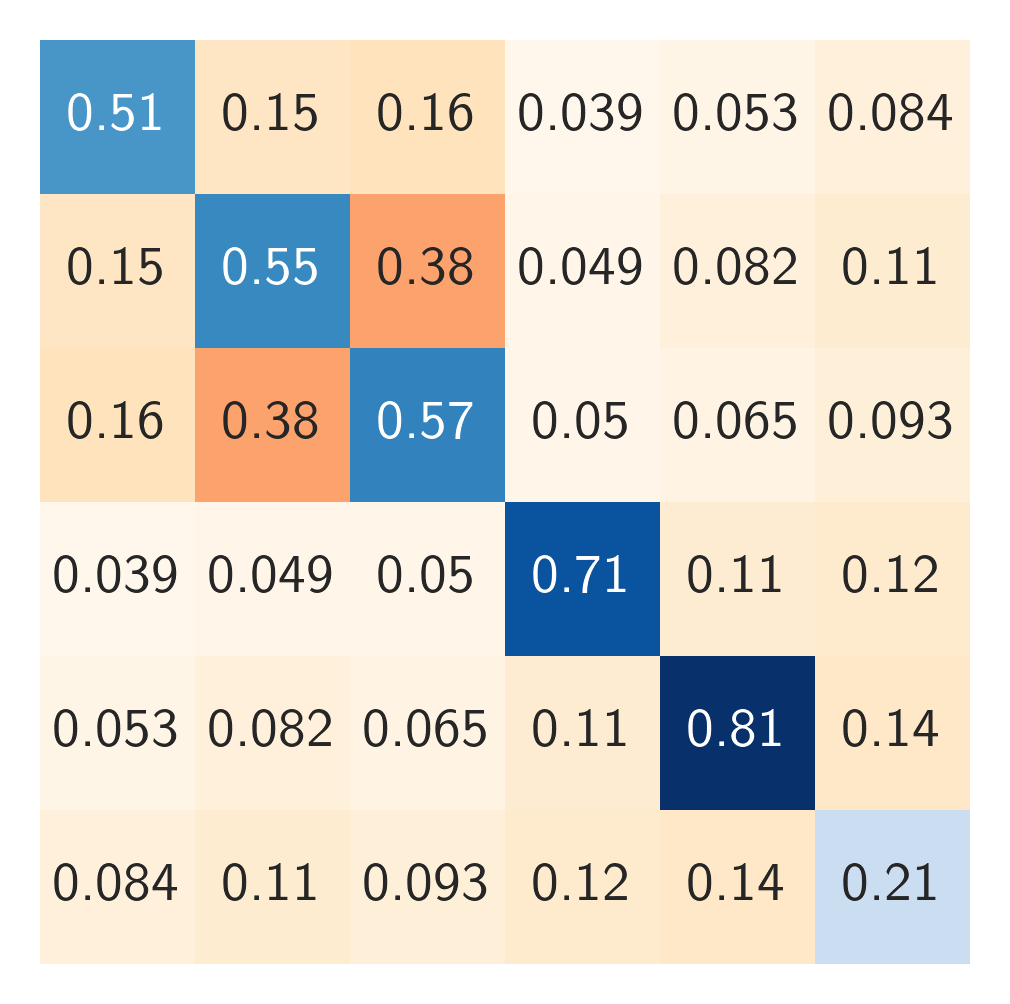

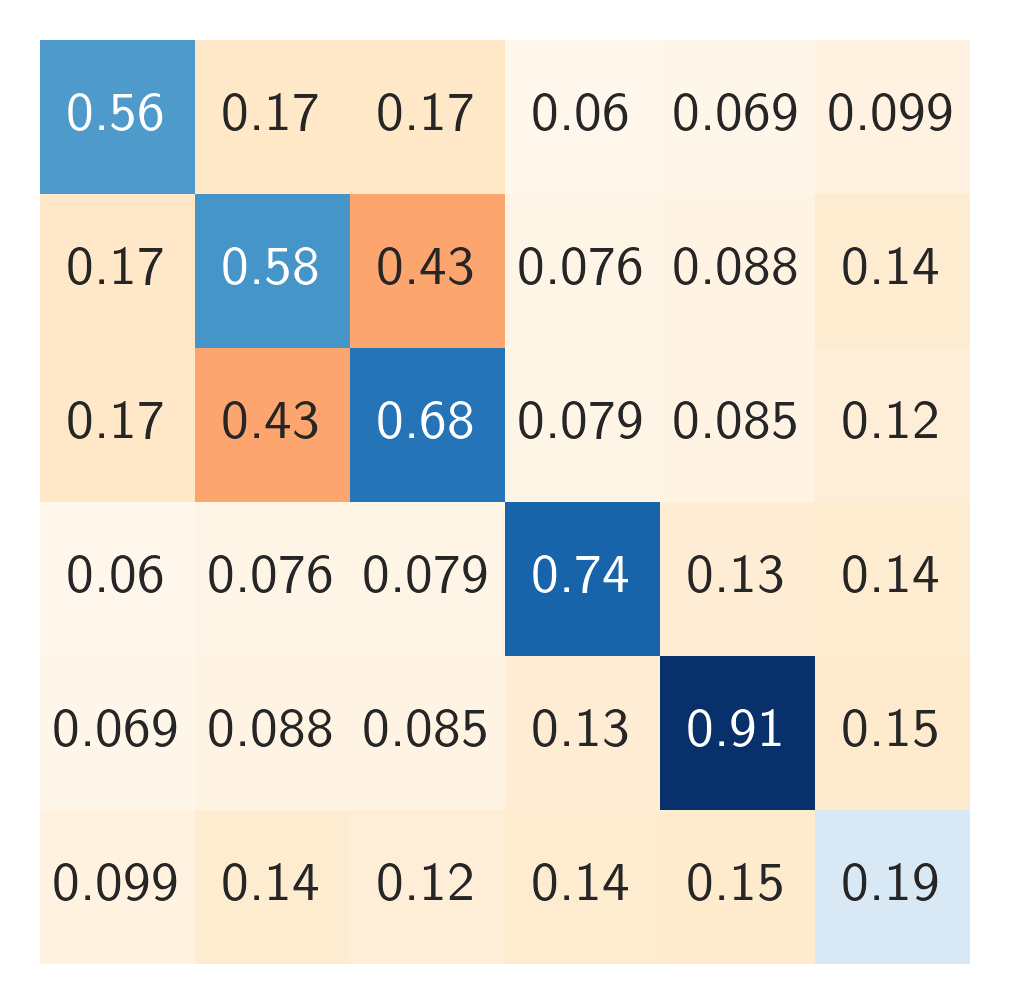

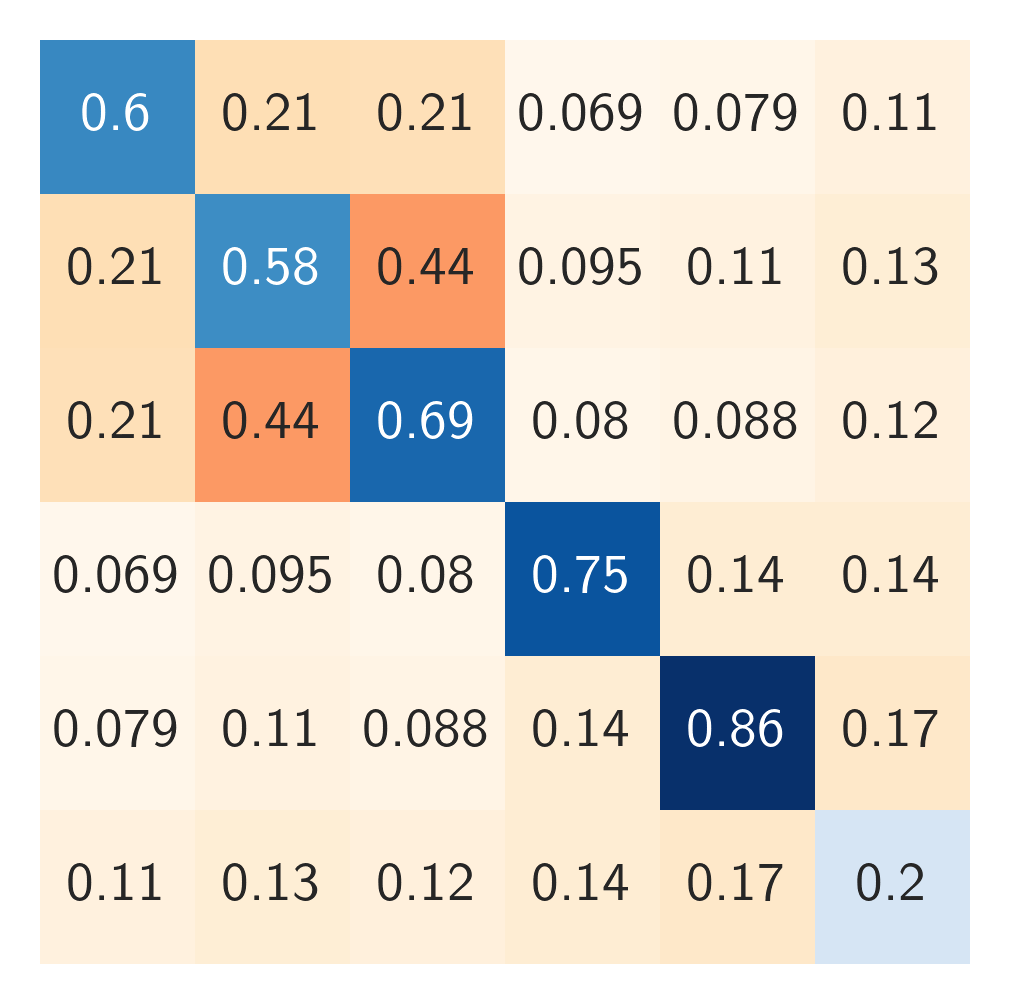

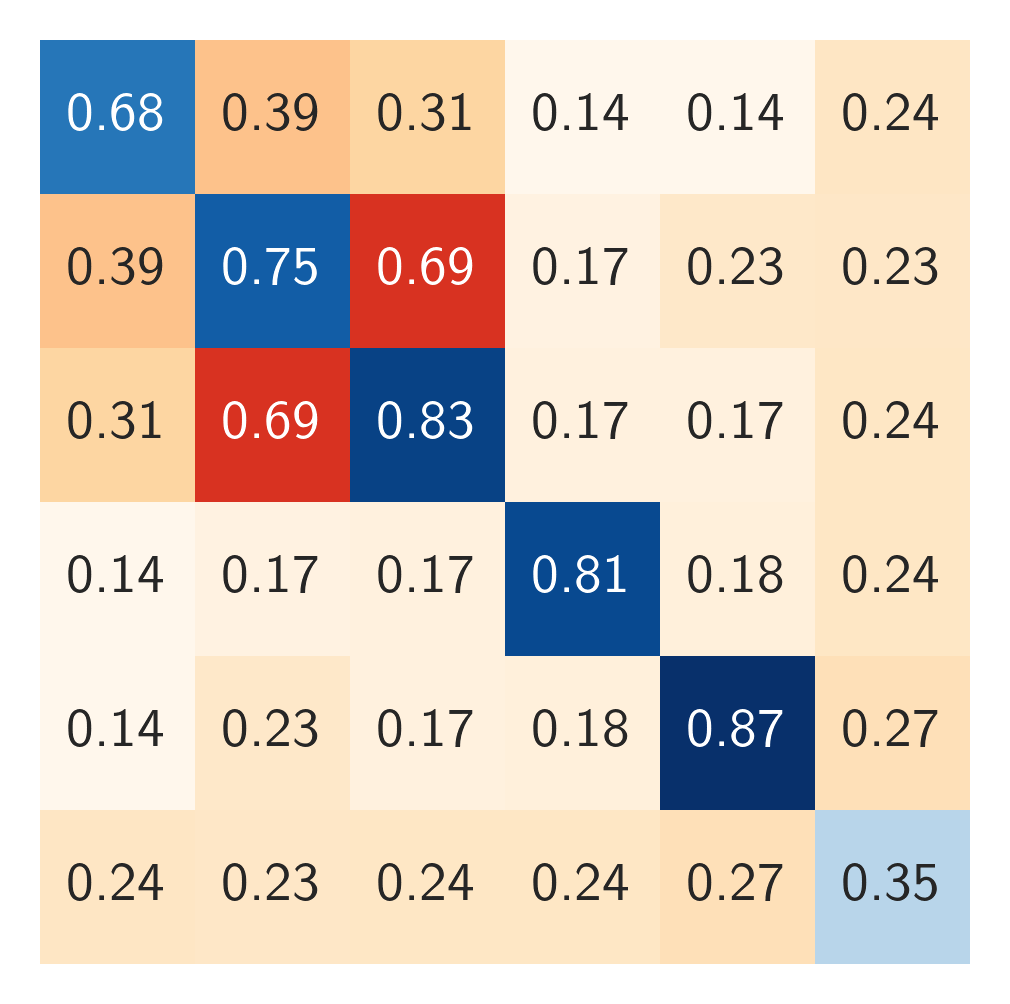

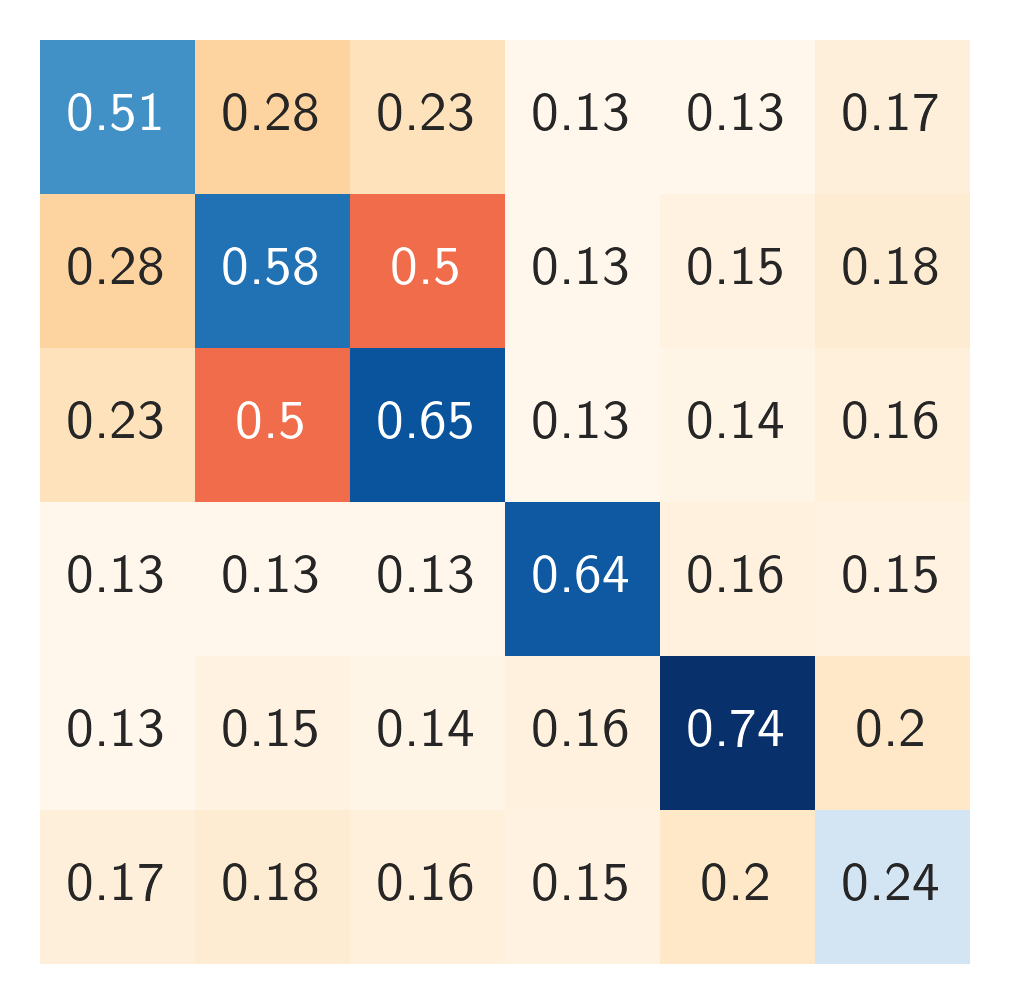

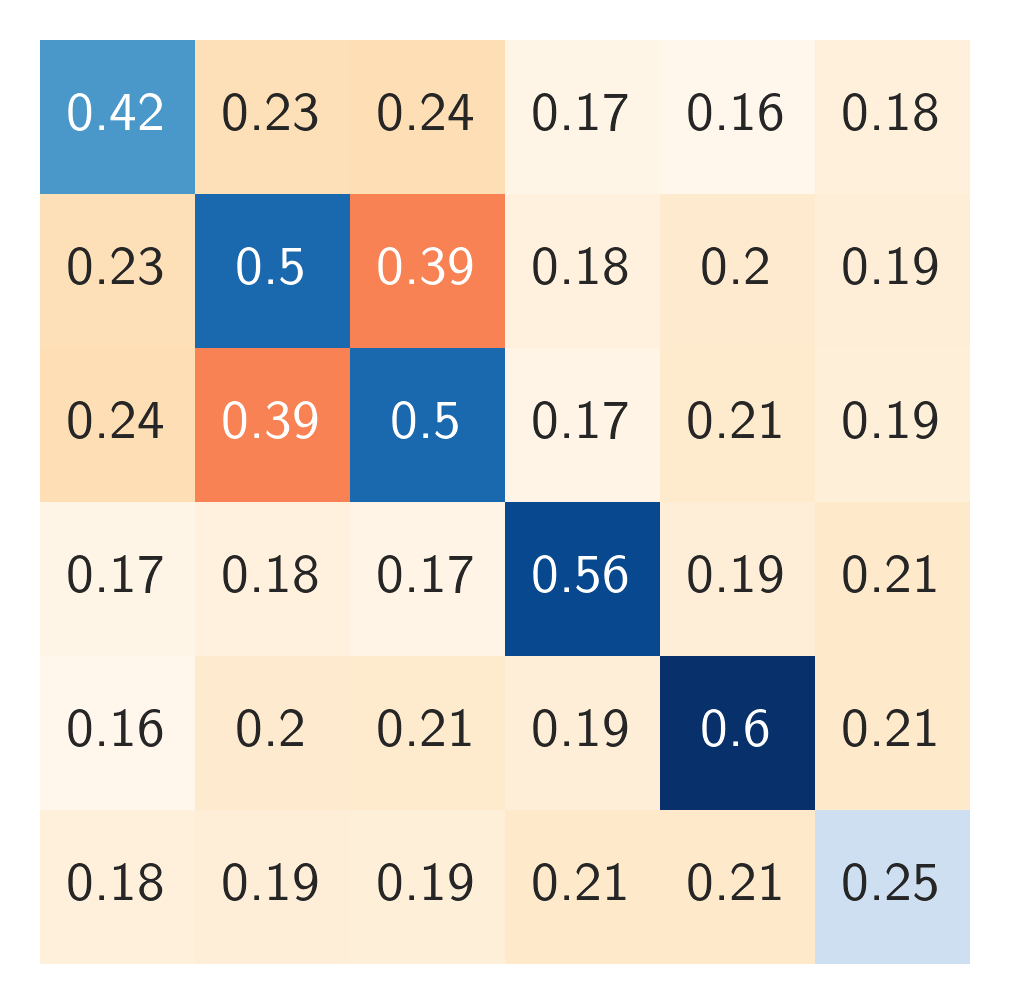

In [3]:
for dataset in ['dogs3', 'birds5']:
    for method in ['drag-and-drop', 'radio']:
        for m in range(2, 9):
            if m > 4 and method == 'radio':
                continue
            P = loadmat(f'mats/P_{m}_{dataset}_{method}.mat')[f'P_{m}'] 
            plot(P, m, dataset, method)